In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from sampleDiscrete import sampleDiscrete

from bmm import BMM

In [2]:
np.random.seed(1)
# load data
data = sio.loadmat('kos_doc_data.mat')
A = np.array(data['A'])
B = data['B']
V = data['V']

# Exercise A

In [3]:
W = np.max([np.max(A[:, 1]), np.max(B[:, 1])])  # total number of unique words
D = np.max(A[:, 0])  # number of documents in A

word_counts = np.zeros(W)
# Populate the count matrices by looping over documents
for d in range(D):
    training_documents = np.where(A[:, 0] == d+1)  # get all occurrences of document d in the training data
    w = np.array(A[training_documents, 1])  # number of unique words in document d
    c = np.array(A[training_documents, 2])  # counts of words in document d
    word_counts[w-1] += c  # number of times w is assigned to component k

In [4]:
no_words = np.sum(word_counts).astype(int)
word_freq = word_counts / no_words

In [5]:
top_20_ids = np.argsort(word_freq)[-20:]
top_20_freq = word_freq[top_20_ids]
top_20_words = [word[0] for word in V[top_20_ids, 0]]

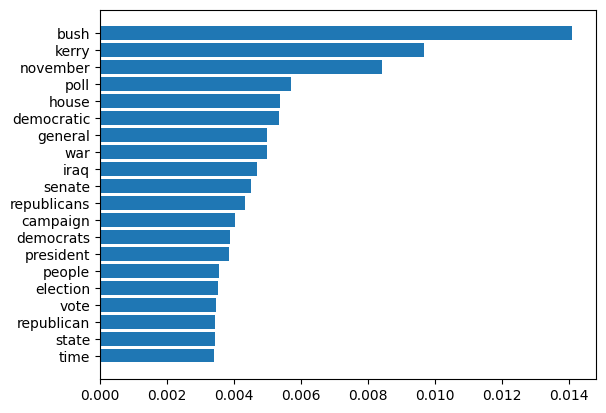

In [6]:
plt.barh(top_20_words, top_20_freq)
plt.show()

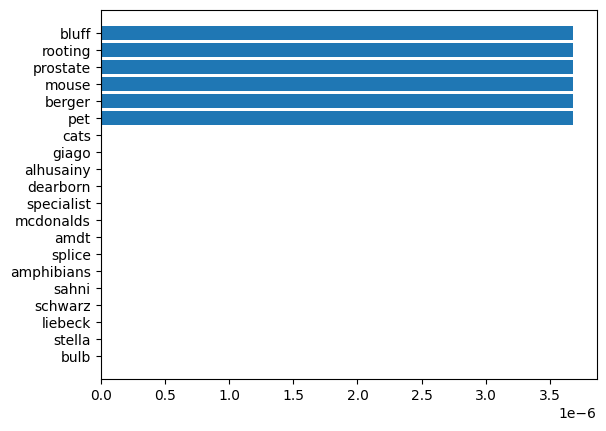

In [7]:
bot_20_ids = np.argsort(word_freq)[:20]
bot_20_freq = word_freq[bot_20_ids]
bot_20_words = [word[0] for word in V[bot_20_ids, 0]]
plt.barh(bot_20_words, bot_20_freq)
plt.show()

# Exercise B

In [8]:
alpha = 0.1
pseudo_word_count = alpha * np.ones(W)
print(f'Total pseudo-words added = {np.sum(pseudo_word_count)}')

Total pseudo-words added = 690.6


In [9]:
posterior_word_counts = word_counts + pseudo_word_count

In [10]:
posterior_no_words = np.sum(posterior_word_counts).astype(int)
posterior_word_freq = posterior_word_counts / no_words

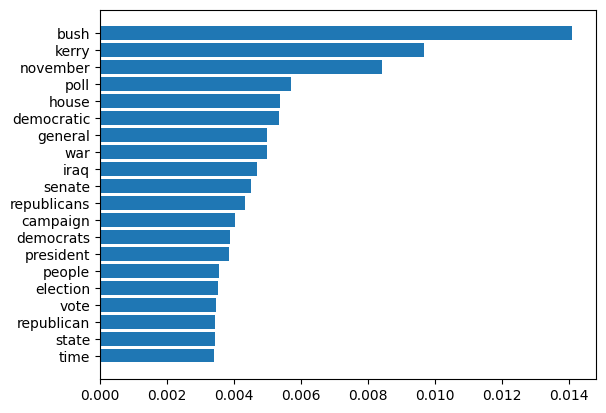

In [11]:
top_20_ids = np.argsort(posterior_word_freq)[-20:]
top_20_freq = posterior_word_freq[top_20_ids]
top_20_words = [word[0] for word in V[top_20_ids, 0]]
plt.barh(top_20_words, top_20_freq)
plt.show()

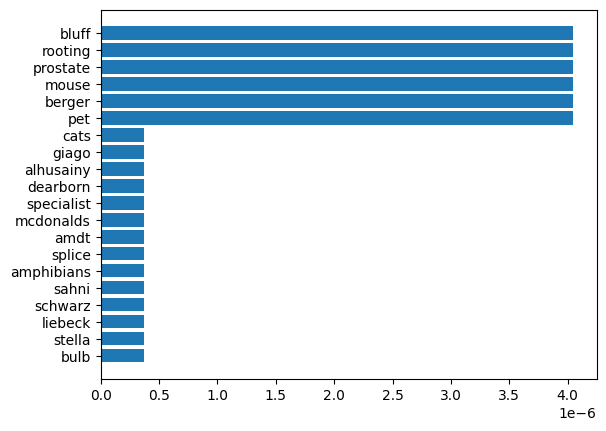

In [12]:
bot_20_ids = np.argsort(posterior_word_freq)[:20]
bot_20_freq = posterior_word_freq[bot_20_ids]
bot_20_words = [word[0] for word in V[bot_20_ids, 0]]
plt.barh(bot_20_words, bot_20_freq)
plt.show()